In [1]:
import pandas as pd
import mplfinance as mpf
from binance.client import Client
import SECRET_TOKENS

In [2]:
api_key = SECRET_TOKENS.api_key
api_secret = SECRET_TOKENS.api_secret
client = Client(api_key, api_secret)

In [3]:
klines = \
client.get_historical_klines("ETHUSDT",
                            Client.KLINE_INTERVAL_30MINUTE,
                            "15 June, 2021",
                            "15 June, 2022")
column_names = ["Open time", "Open", "High",
               "Low", "Close", "Volume", 
                "Close time", "Quote asset volume",
               "Number of trades", "TB base volume",
               "TB quote volume", "Ignore"]
df = pd.DataFrame(klines, dtype=float, columns=column_names)
df["Open time"] = pd.to_datetime(df["Open time"], unit="ms")
df["Close time"] = pd.to_datetime(df["Close time"], unit="ms")

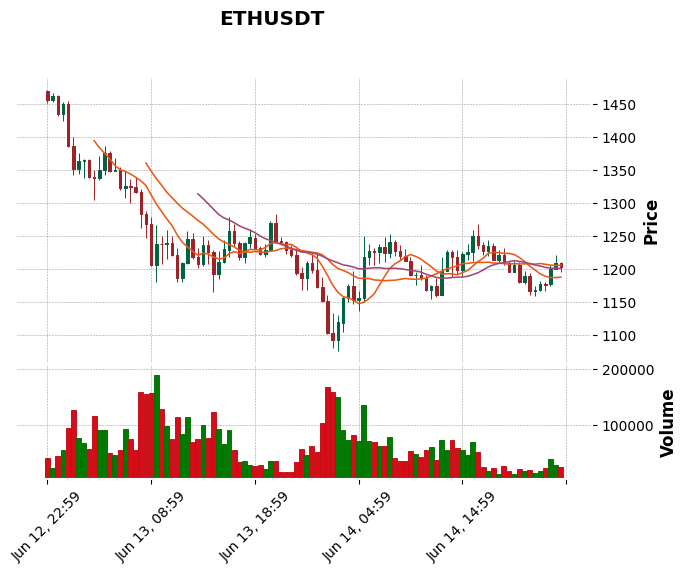

In [5]:
mpf.plot(df.set_index("Close time").tail(100),
        type="candle",
        style="charles",
        volume=True,
        title="ETHUSDT",
        mav=(10,20,30))